# Fake News Prediction

**Problem statement-->**
The authenticity of Information has become a longstanding issue affecting businesses and society, both for printed and digital media. On social networks, the reach and effects of information spread occur at such a fast pace and so amplified that distorted, inaccurate, or false information acquires a tremendous potential to cause real-world impacts, within minutes, for millions of users. Recently, several public concerns about this problem and some approaches to mitigate the problem were expressed.

The sensationalism of not-so-accurate eye-catching and intriguing headlines aimed at retaining the attention of audiences to sell information has persisted all throughout the history of all kinds of information broadcast. On social networking websites, the reach and effects of information spread are however significantly amplified and occur at such a fast pace, that distorted, inaccurate, or false information acquires a tremendous potential to cause real impacts, within minutes, for millions of users.

**Objective-->**
Our sole objective is to classify the news from the dataset as fake or true news.
Extensive EDA of news
Selecting and building a powerful model for classification


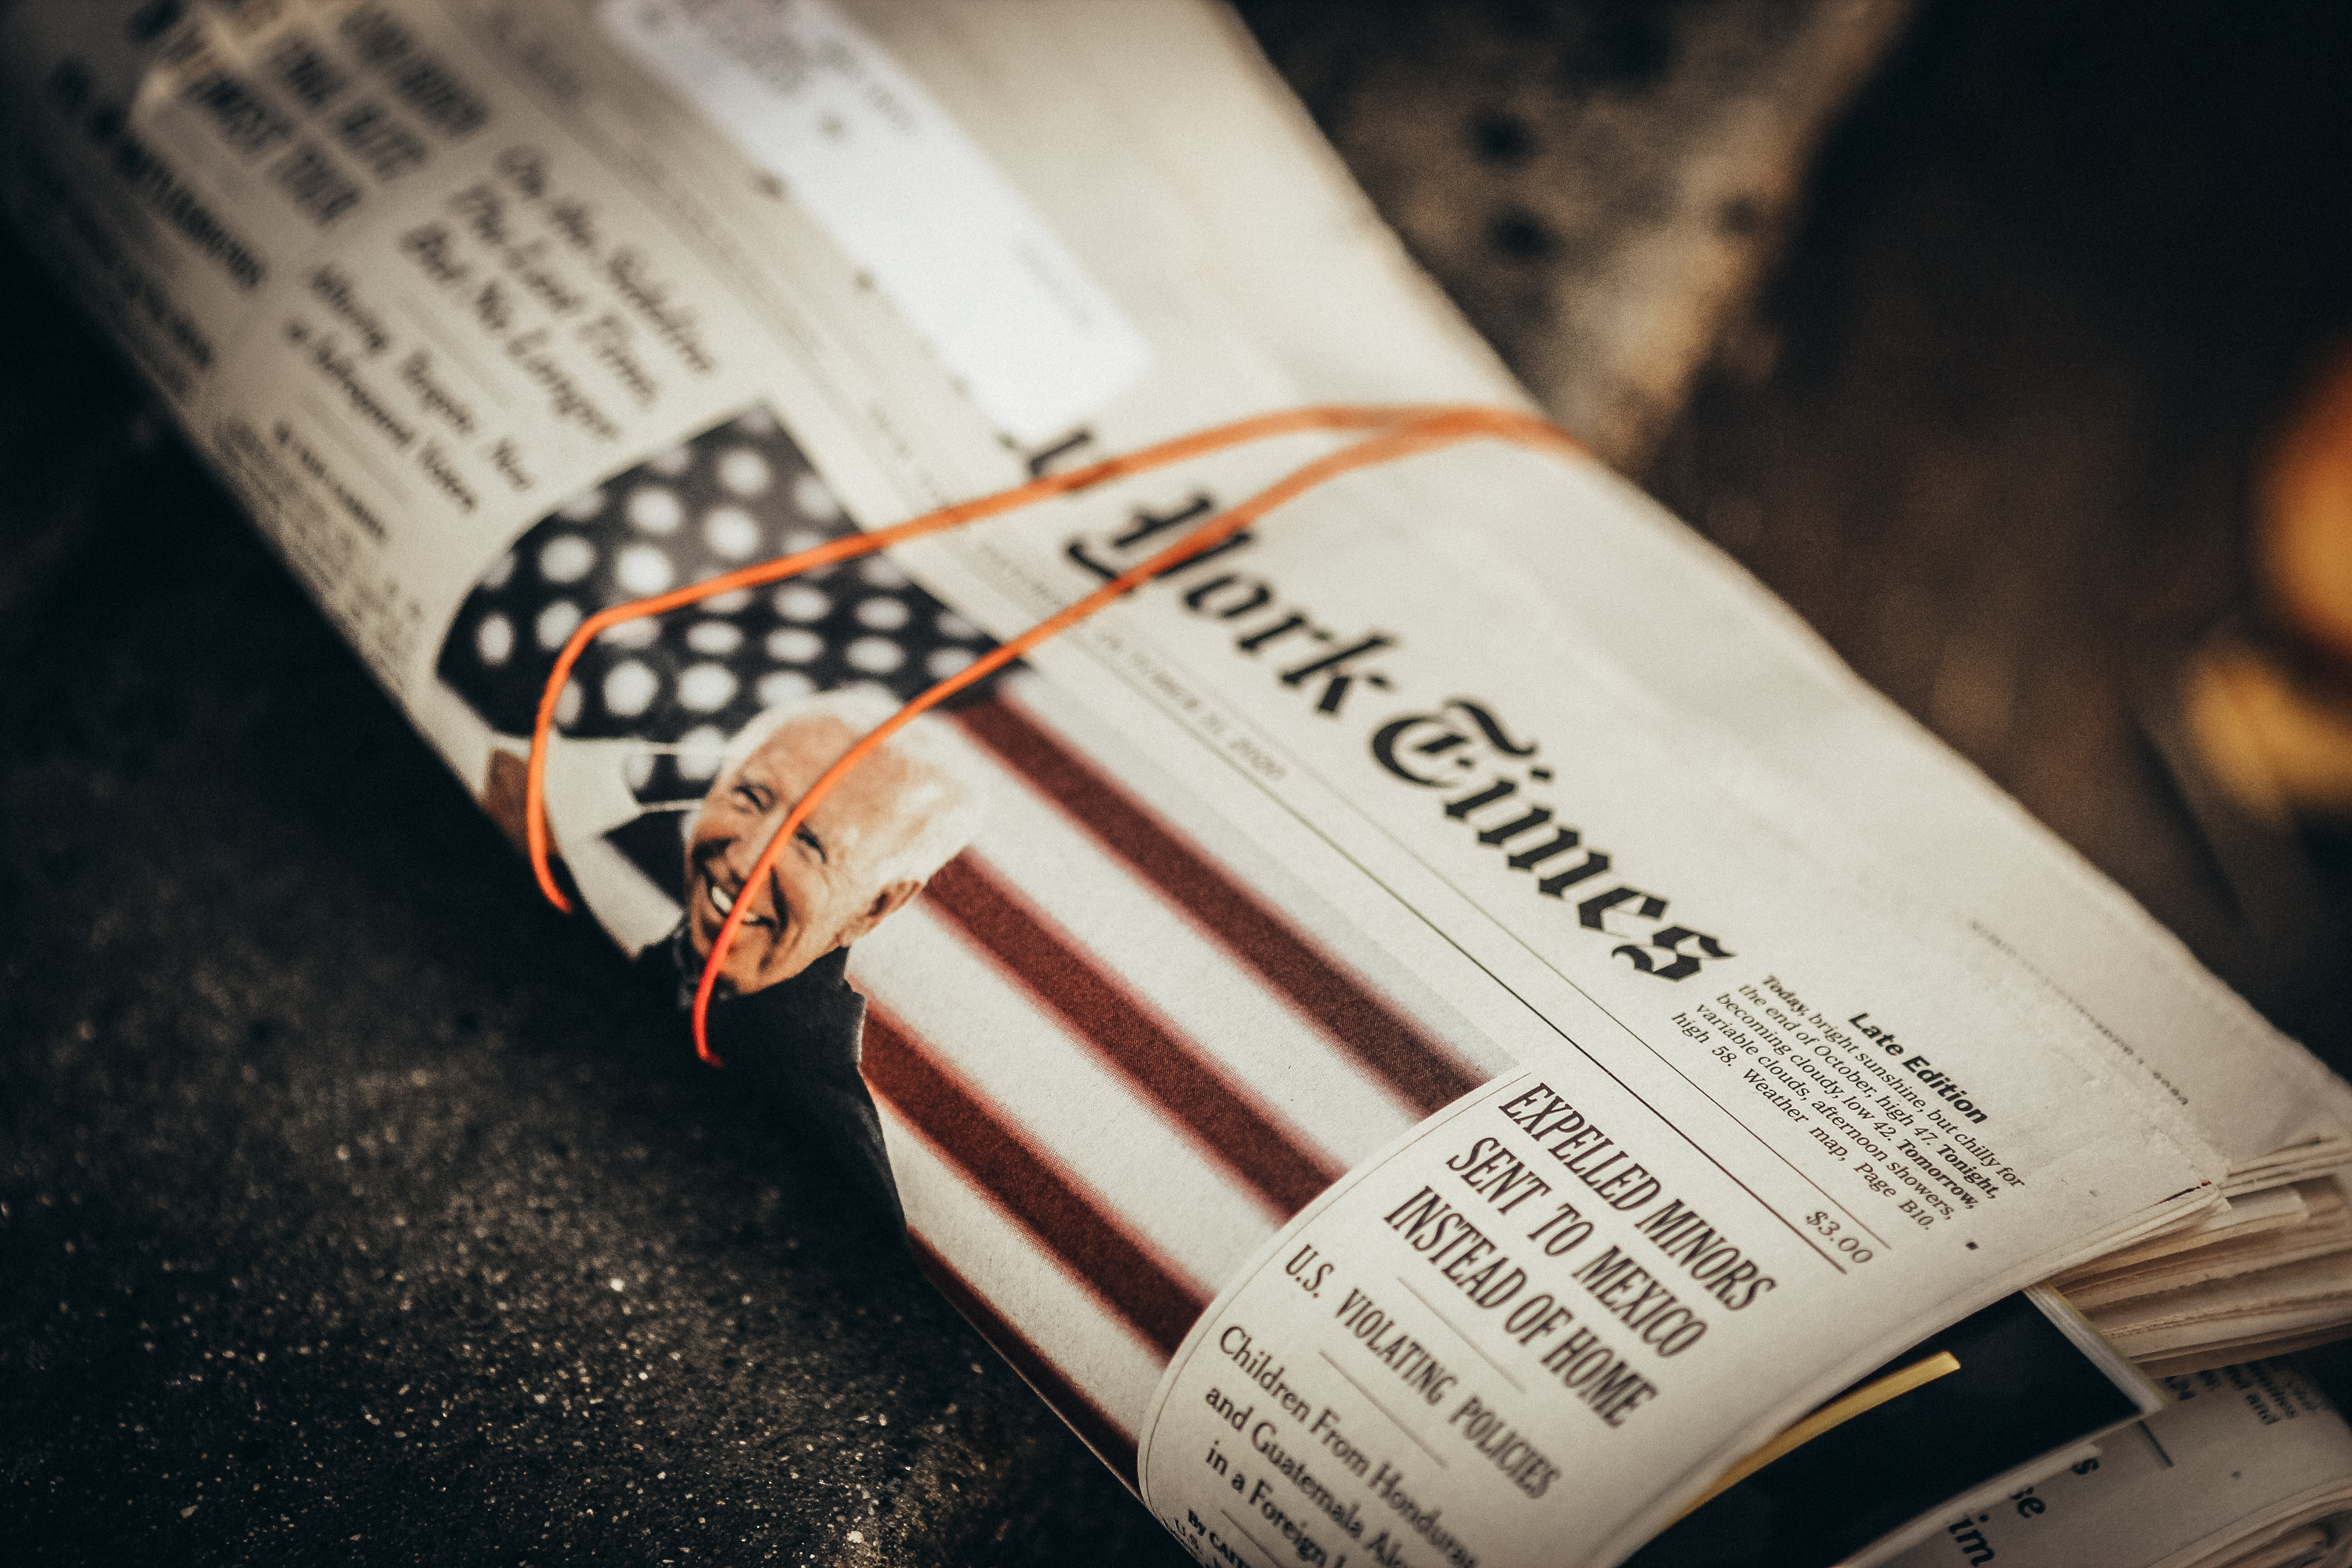

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


## Dataframe 1

In [2]:
df1 = pd.read_csv("True.csv")
df1.head()

title  \
0  As U.S. budget fight looms, Republicans flip t...   
1  U.S. military to accept transgender recruits o...   
2  Senior U.S. Republican senator: 'Let Mr. Muell...   
3  FBI Russia probe helped by Australian diplomat...   
4  Trump wants Postal Service to charge 'much mor...   

                                                text       subject  \
0  WASHINGTON (Reuters) - The head of a conservat...  politicsNews   
1  WASHINGTON (Reuters) - Transgender people will...  politicsNews   
2  WASHINGTON (Reuters) - The special counsel inv...  politicsNews   
3  WASHINGTON (Reuters) - Trump campaign adviser ...  politicsNews   
4  SEATTLE/WASHINGTON (Reuters) - President Donal...  politicsNews   

                 date  
0  December 31, 2017   
1  December 29, 2017   
2  December 31, 2017   
3  December 30, 2017   
4  December 29, 2017

In [3]:
df1["answer"] = 1
df1.head()

title  \
0  As U.S. budget fight looms, Republicans flip t...   
1  U.S. military to accept transgender recruits o...   
2  Senior U.S. Republican senator: 'Let Mr. Muell...   
3  FBI Russia probe helped by Australian diplomat...   
4  Trump wants Postal Service to charge 'much mor...   

                                                text       subject  \
0  WASHINGTON (Reuters) - The head of a conservat...  politicsNews   
1  WASHINGTON (Reuters) - Transgender people will...  politicsNews   
2  WASHINGTON (Reuters) - The special counsel inv...  politicsNews   
3  WASHINGTON (Reuters) - Trump campaign adviser ...  politicsNews   
4  SEATTLE/WASHINGTON (Reuters) - President Donal...  politicsNews   

                 date  answer  
0  December 31, 2017        1  
1  December 29, 2017        1  
2  December 31, 2017        1  
3  December 30, 2017        1  
4  December 29, 2017        1

In [4]:
df1 = df1.drop(["title","subject","date"],axis=1)
df1.head()

text  answer
0  WASHINGTON (Reuters) - The head of a conservat...       1
1  WASHINGTON (Reuters) - Transgender people will...       1
2  WASHINGTON (Reuters) - The special counsel inv...       1
3  WASHINGTON (Reuters) - Trump campaign adviser ...       1
4  SEATTLE/WASHINGTON (Reuters) - President Donal...       1

## Dataframe 2

In [5]:
df2 = pd.read_csv("Fake.csv")
df2.head()

title  \
0   Donald Trump Sends Out Embarrassing New Year’...   
1   Drunk Bragging Trump Staffer Started Russian ...   
2   Sheriff David Clarke Becomes An Internet Joke...   
3   Trump Is So Obsessed He Even Has Obama’s Name...   
4   Pope Francis Just Called Out Donald Trump Dur...   

                                                text subject  \
0  Donald Trump just couldn t wish all Americans ...    News   
1  House Intelligence Committee Chairman Devin Nu...    News   
2  On Friday, it was revealed that former Milwauk...    News   
3  On Christmas day, Donald Trump announced that ...    News   
4  Pope Francis used his annual Christmas Day mes...    News   

                date  
0  December 31, 2017  
1  December 31, 2017  
2  December 30, 2017  
3  December 29, 2017  
4  December 25, 2017

In [6]:
df2["answer"] = 0
df2.head()

title  \
0   Donald Trump Sends Out Embarrassing New Year’...   
1   Drunk Bragging Trump Staffer Started Russian ...   
2   Sheriff David Clarke Becomes An Internet Joke...   
3   Trump Is So Obsessed He Even Has Obama’s Name...   
4   Pope Francis Just Called Out Donald Trump Dur...   

                                                text subject  \
0  Donald Trump just couldn t wish all Americans ...    News   
1  House Intelligence Committee Chairman Devin Nu...    News   
2  On Friday, it was revealed that former Milwauk...    News   
3  On Christmas day, Donald Trump announced that ...    News   
4  Pope Francis used his annual Christmas Day mes...    News   

                date  answer  
0  December 31, 2017       0  
1  December 31, 2017       0  
2  December 30, 2017       0  
3  December 29, 2017       0  
4  December 25, 2017       0

In [7]:
df2 = df2.drop(["title","subject","date"],axis=1)
df2.head()

text  answer
0  Donald Trump just couldn t wish all Americans ...       0
1  House Intelligence Committee Chairman Devin Nu...       0
2  On Friday, it was revealed that former Milwauk...       0
3  On Christmas day, Donald Trump announced that ...       0
4  Pope Francis used his annual Christmas Day mes...       0

# Merge two Dataframe together


In [8]:
df = pd.concat([df1,df2],ignore_index=True)
df.head()

text  answer
0  WASHINGTON (Reuters) - The head of a conservat...       1
1  WASHINGTON (Reuters) - Transgender people will...       1
2  WASHINGTON (Reuters) - The special counsel inv...       1
3  WASHINGTON (Reuters) - Trump campaign adviser ...       1
4  SEATTLE/WASHINGTON (Reuters) - President Donal...       1

In [9]:
df.tail()

text  answer
44893  21st Century Wire says As 21WIRE reported earl...       0
44894  21st Century Wire says It s a familiar theme. ...       0
44895  Patrick Henningsen  21st Century WireRemember ...       0
44896  21st Century Wire says Al Jazeera America will...       0
44897  21st Century Wire says As 21WIRE predicted in ...       0

## Word preprocessing 

In [10]:
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
import re

In [11]:
df = df.sample(1000)
df = df.reset_index()

In [12]:
porter_s = PorterStemmer()
new_df = []
for j in range(len(df["text"])):
        data = re.sub("[^a-zA-Z]"," ",df["text"][j])
        data = data.lower()
        data = data.split()
        data = [porter_s.stem(word)for word in data if word not in set(stopwords.words("english"))]
        data = " ".join(data)
        new_df.append(data)

In [13]:
new_df[0]

'seoul reuter u presid donald trump defens secretari warn north korea friday effect overwhelm respons chose use nuclear weapon reassur south korea steadfast u support attack unit state alli defeat use nuclear weapon would met respons would effect overwhelm defens secretari jim matti said south korea defens ministri end two day visit matti remark come amid concern north korea could readi test new ballist missil could earli challeng trump administr north korea regularli threaten destroy south korea main alli unit state conduct missil test last year well two nuclear test defianc u n resolut sanction north also appear also restart oper reactor main yongbyon nuclear facil produc plutonium use nuclear weapon program accord u think tank north north korea continu launch missil develop nuclear weapon program engag threaten rhetor behavior matti said north korea action prompt unit state south korea respond bolster defens includ expect deploy u missil defens system known termin high altitud area 

In [14]:
new_df[8]

'fort lee va reuter presid barack obama wednesday call senat vote overrid veto legisl allow rel victim sept attack sue saudi arabia govern mistak elimin notion sovereign immun men women uniform around world could potenti start see subject reciproc loss obama said town hall meet style interview cnn refer potenti lawsuit danger preced said'

## Onehot representation 

In [15]:
!pip install tensorflow

In [16]:
x = new_df
y = df["answer"]

In [17]:
import tensorflow as tf

In [18]:
from tensorflow.keras.preprocessing.text import one_hot 

In [19]:
voc_size = 10000

onehot_repr = [one_hot(word,voc_size)for word in x]
len(onehot_repr[0])

335

In [20]:
len(onehot_repr[5])

167

In [21]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
dimension = 1000
embedded_docs = pad_sequences(onehot_repr,padding="pre",maxlen=dimension)

In [22]:
embedded_docs[0:10]

array([[   0,    0,    0, ...,  449, 2840, 4735],
       [   0,    0,    0, ..., 6330, 4044, 7122],
       [   0,    0,    0, ..., 2402, 7497, 7916],
       ...,
       [   0,    0,    0, ..., 1492, 2527, 4388],
       [   0,    0,    0, ..., 4564, 3047, 7763],
       [   0,    0,    0, ..., 4993, 1530, 5619]])

## Embedding Representation

In [23]:
#creating model 
from tensorflow.keras.layers import Embedding
from tensorflow.keras.layers import LSTM
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [24]:
embedding_feature = 800
model = Sequential()
model.add(Embedding(voc_size,embedding_feature,input_length = dimension))
model.add(LSTM(1200))
model.add(Dense(1,activation='sigmoid'))
model.compile(loss="binary_crossentropy",optimizer="adam",metrics=['accuracy'])
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 1000, 800)         8000000   
                                                                 
 lstm (LSTM)                 (None, 1200)              9604800   
                                                                 
 dense (Dense)               (None, 1)                 1201      
                                                                 
Total params: 17,606,001
Trainable params: 17,606,001
Non-trainable params: 0
_________________________________________________________________
None


## Fitting Training Data And Testing Model Using Testing Data

In [25]:
import numpy as np
x = np.array(embedded_docs)
y = np.array(y)

In [26]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.30,random_state=-0)

In [27]:
model.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=5)

Epoch 1/5
22/22 [==============================] - 664s 30s/step - loss: 0.6672 - accuracy: 0.8014 - val_loss: 0.3392 - val_accuracy: 0.8933
Epoch 2/5
22/22 [==============================] - 753s 34s/step - loss: 0.2002 - accuracy: 0.9543 - val_loss: 0.2263 - val_accuracy: 0.9100
Epoch 3/5
22/22 [==============================] - 796s 36s/step - loss: 0.0276 - accuracy: 0.9957 - val_loss: 0.1531 - val_accuracy: 0.9367
Epoch 4/5
22/22 [==============================] - 834s 38s/step - loss: 0.0066 - accuracy: 0.9986 - val_loss: 0.1505 - val_accuracy: 0.9500
Epoch 5/5
22/22 [==============================] - 901s 41s/step - loss: 0.0013 - accuracy: 1.0000 - val_loss: 0.1591 - val_accuracy: 0.9233
